<a href="https://colab.research.google.com/github/martuscellifaria/MachineLearning/blob/main/01_Salary_Prediction_Using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Salary prediction using linear regression**

This is a first of many notebooks destinated to studies on Machine Learning and Data Science. We will start as simple as possible in order to democratize such knowledge. Moreover, let's create a linear regression model to predict new workers salary with respect to years of experience of past workers of a company.
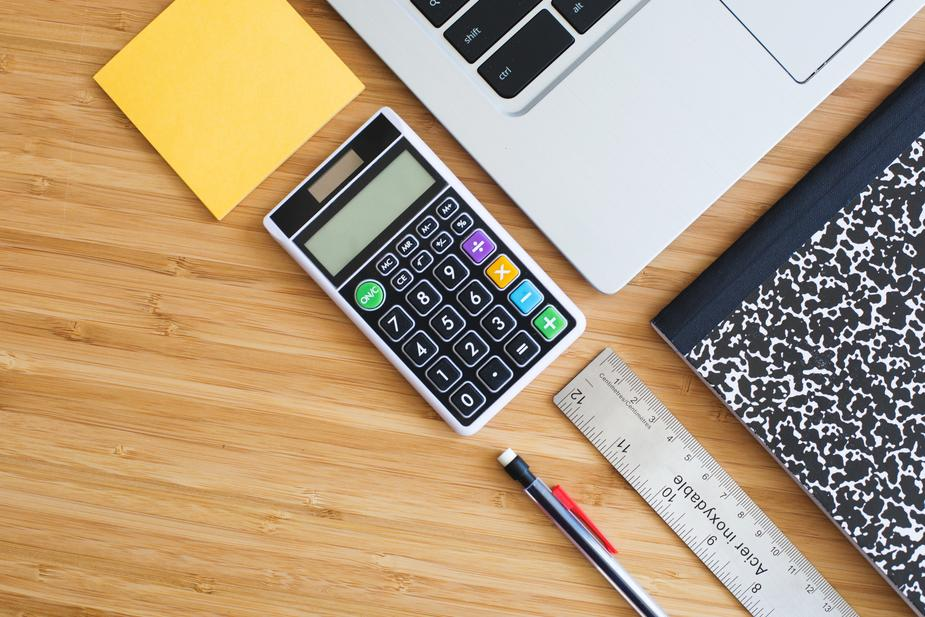

#**01. Importing libraries**
For anyone who's not familiarized with *Python* yet, an important step is the libraries import. Most of the calculation and plotting for Machine Learning purposes will rely on Numpy, Pandas, SkLearn and Matplotlib. In this step, only Numpy, Pandas and Matplotlib will be utilized. Their individual functions follow:


*   Numpy - Perform mathematical operations;
*   Pandas - Perform data manipulation and analysis;
*   Matplotlib - Library for plotting and visualizing data.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **02. Loading data from a .csv file**
One of the most important and most used functions from the Pandas library is its easy-use data reading and loading. Let us then load the Salary_Data.csv file and allocate their columns to vectors X and Y, representative of X and Y axis of a chart. We will use the *.head() to show the first five entries of the table.

In [ ]:
dataset= pd.read_csv('/content/drive/My Drive/Colab Notebooks/Study Datasets/Salary_Data.csv')
X= dataset.iloc[:,:-1].values
Y= dataset.iloc[:,1].values
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#**03. Splitting the dataset in training and test sets**
In order to have an effective predictive model, the dataset will be split in a training and a test set. It will result in four vectors. X_Train, Y_Train, X_Test, Y_Test. Given the size of the database, the split will be made by taking 25% of the entries as the test set and 75% as the training set.
The dataset split is performed with aid of the ***sklearn.model_selection*** library, so it is mandatory to import it first.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# **04. Fitting simple linear regression to the training set**
In this step, we will need to import once again part of the sklearn library, the ***sklearn.linear_model***. This model will create a linear regression based on the X and Y training set.

In [ ]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#**05. Visualizing the training set results**
Here, we will use the Matplotlib to visualize the regression obtained from the training data.

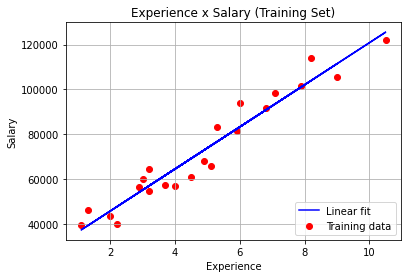

In [ ]:
plt.scatter(X_train,Y_train,color='red', label='Training data')
plt.plot(X_train,regressor.predict(X_train),color='blue', label='Linear fit')
plt.title('Experience x Salary (Training Set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.grid(which='major')
plt.grid(which='minor')
plt.legend(loc='lower right')
plt.show()

#**06. Predicting the test set results**
In this section, the obtained linear regression model is called in order to obtain the salary predictions Y_Pred with respect to the X_Test values for Years of Experience. After that, it is possible to compare it to the actual salary.

In [ ]:
Y_pred= regressor.predict(X_test)
np.set_printoptions(precision=2)
print('[Predicted  Actual Salary]')
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[Predicted  Actual Salary]
[[ 41056.26  37731.  ]
 [123597.71 122391.  ]
 [ 65443.5   57081.  ]
 [ 63567.56  63218.  ]
 [116093.94 116969.  ]
 [108590.17 109431.  ]
 [117031.91 112635.  ]
 [ 64505.53  55794.  ]]


#**07. Evaluating model performance with the R-Square method**
From ***sklearn.metrics*** library, one can gather the R² method to verify the accuracy of the regression model. The more it approaches the unit, more accurate the model.

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.9779208335417602

# **08. Conclusion**
The linear regression model created by taking 75% of the data as training set has shown an accuracy of over 97% and, therefore, the linear relation between working years and salary has proven to be adequate.